In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Import warnings
import warnings 
warnings.filterwarnings('ignore')

In [91]:
Dataframe = pd.read_csv('data/winequalityN.csv')
# Show rows and columns
Dataframe.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [92]:
# Getting info
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [93]:
# Statistical characteristics of each numerical feature
Dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [94]:
# Data dimensionality (rows, colums)
Dataframe.shape

(6497, 13)

In [95]:
Dataframe.isna().any(axis=None)

True

In [96]:
# Check null values
Dataframe.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [97]:
# In data there are not many null values so simply fill them with the help of the fillna() function
Dataframe.update(Dataframe.fillna(Dataframe.mean()))
Dataframe

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


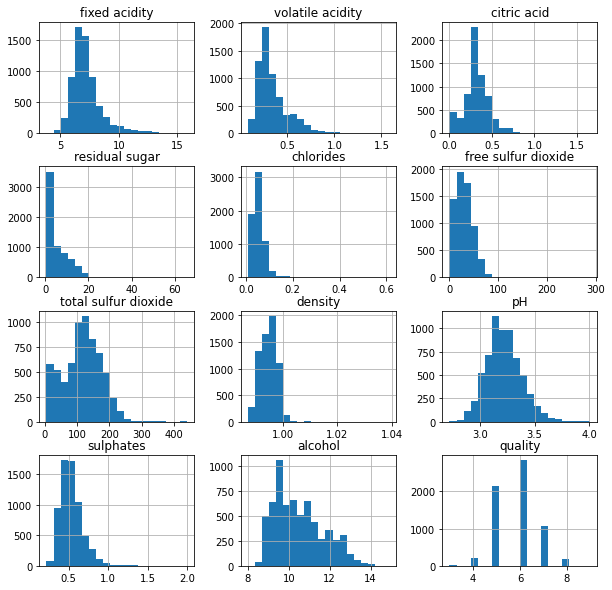

In [98]:
# Plot histogram
Dataframe.hist(bins=20,figsize=(10, 10))
# Plot showing
plt.show()

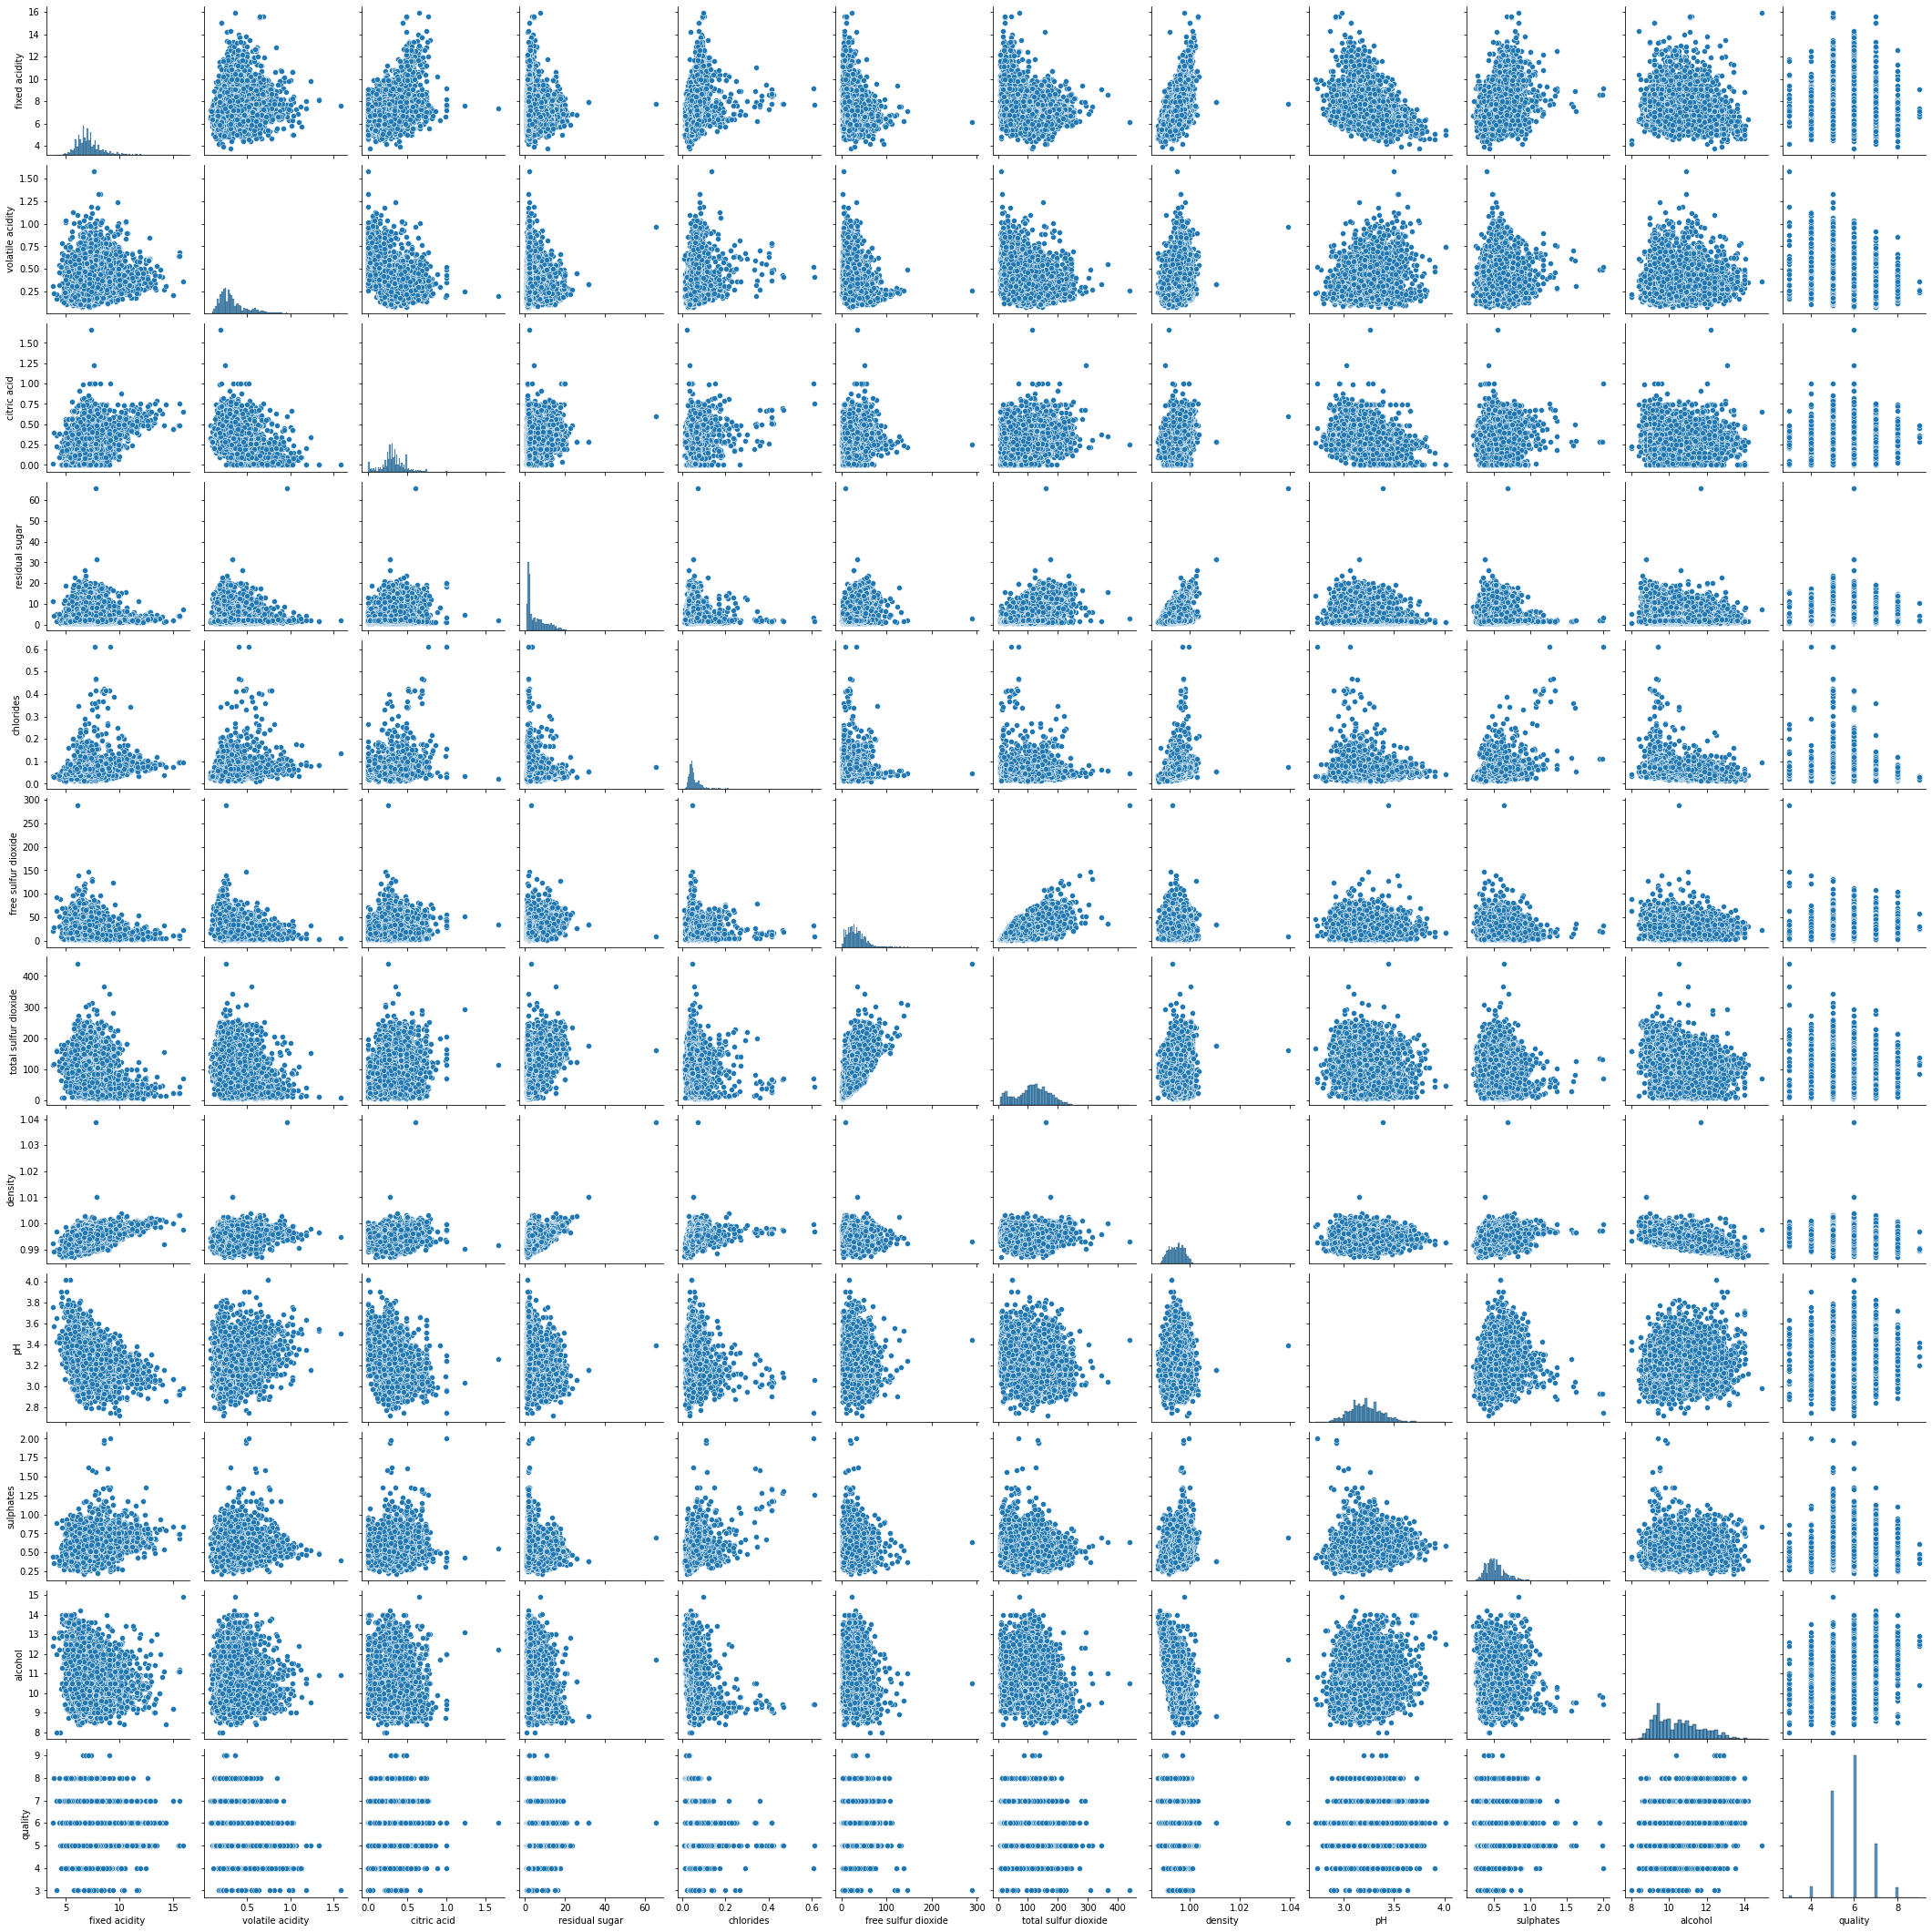

In [99]:
# Plot pairplot
sb.pairplot(Dataframe)
# Plot showing
plt.show()

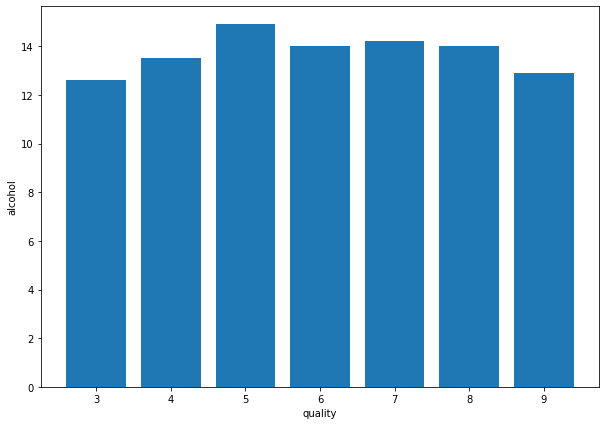

In [100]:
# Plot the bar graph in which we check what value of alcohol can able to make changes in quality
plt.figure(figsize=[10,7])
plt.bar(Dataframe['quality'],Dataframe['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [101]:
# get_dummies() function which is used for handling categorical columns,in this dataset ‘Type’ feature contains two types
# Red and White,where Red consider as 0 and white considers as 1.
Dataframe = pd.get_dummies(Dataframe,drop_first=True)
Dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0


In [102]:
Dataframe['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [103]:
Dataframe['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [104]:
# Dividing wine as good and bad by giving the limit for the quality
Dataframe['quality'] = pd.cut(Dataframe['quality'], bins=[0, 6.5, 10], labels=["bad", "good"])
Dataframe.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,bad,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,bad,1


0    5220
1    1277
Name: quality, dtype: int64


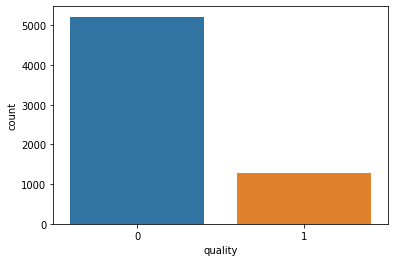

In [105]:
# Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
# Bad becomes 0 and good becomes 1
Dataframe['quality'] = label_quality.fit_transform(Dataframe['quality'])
print(Dataframe['quality'].value_counts())

sb.countplot(Dataframe['quality'])
plt.show()

In [106]:
# For understanding how much each attribute correlates with the quality score of wine
# compute the standard correlation coefficient,between every pair of attributes.
corr_matrix = Dataframe.corr()
print(corr_matrix["quality"].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.390486
type_white              0.087479
citric acid             0.054175
sulphates               0.034156
pH                      0.027720
free sulfur dioxide     0.014767
fixed acidity          -0.049655
total sulfur dioxide   -0.051226
residual sugar         -0.063855
volatile acidity       -0.151390
chlorides              -0.161904
density                -0.275441
Name: quality, dtype: float64


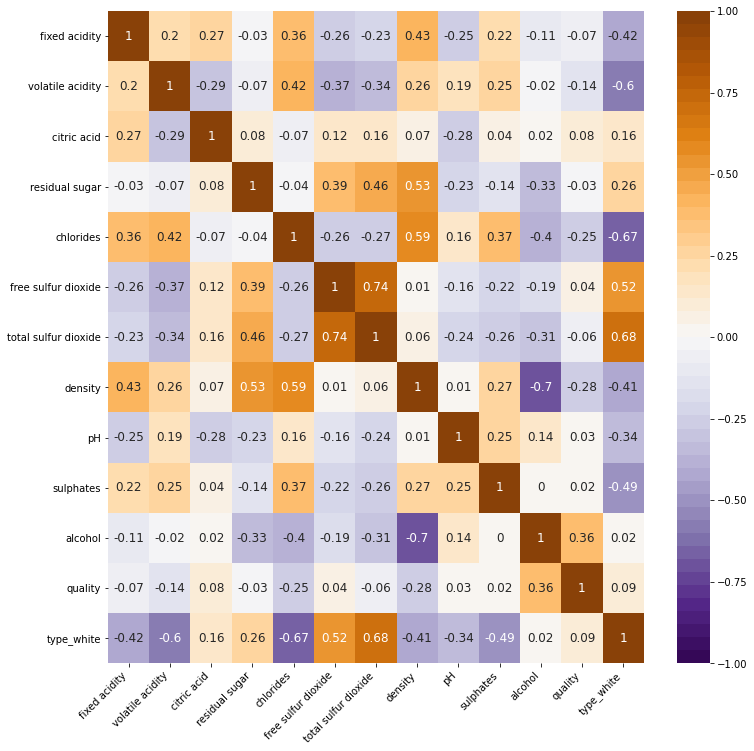

In [107]:
# Get the confusion matrix
correlations = round(Dataframe.corr(method ="spearman"), 2)
# Plot figsize
fig, ax = plt.subplots(figsize=(12, 12))
# Generate HeatMap, allow annotations and place floats in map
sb.heatmap(correlations, annot=True, annot_kws={"size": 12}, cmap = sb.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
ax.set_xticklabels(
    correlations.index,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(correlations.index);
plt.show()

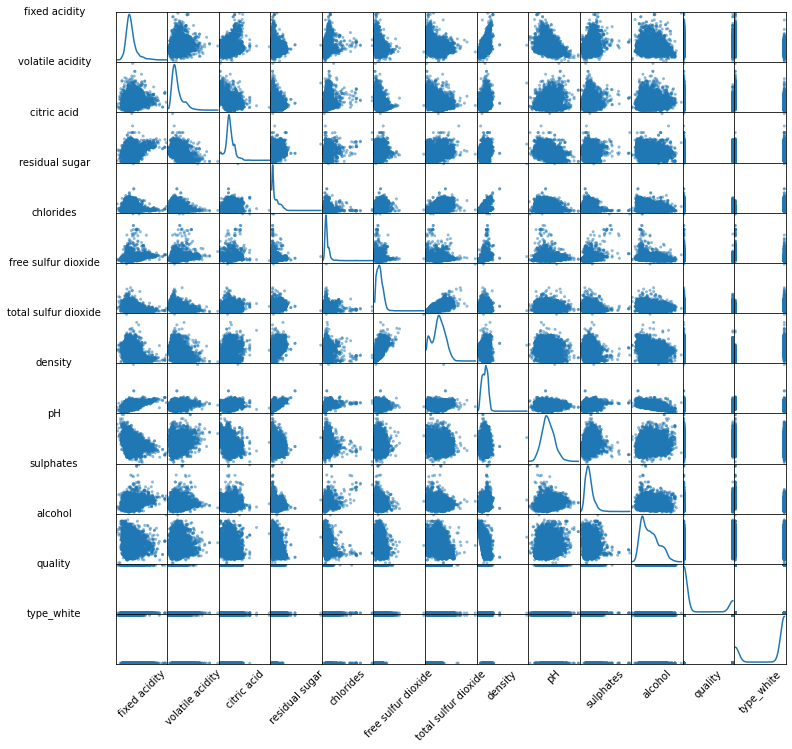

In [108]:
# Scatterplot Matrix
sm = scatter_matrix(Dataframe, figsize=(12, 12), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1.2,0.9) for s in sm.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

In [109]:
# Splitting into two groups: training set 80%, test set 20%. 
# The training set should be used to build machine learning models.
# The test set should be used to see how well model performs on unseen data.

# Seperate the dataset as response variable and feature variabes
X = Dataframe.drop('quality', axis=1)
y = Dataframe['quality']
# Train and Test splitting of data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=50) 
# random_state controls the shuffling applied to the data before applying the split
# Applying Standard scaling to get optimized result
# We do normalization on numerical data because our data is unbalanced it means the difference between the variable values is high 
# so we convert them into 1 and 0.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)

[[-0.17169382  1.14986706  0.76848756 ... -0.2105007   1.66964805
   0.57520246]
 [ 0.60309067  0.96793543  0.49205074 ...  0.58548374  0.1662469
  -1.73851828]
 [ 0.29317687  0.84664767  0.0773955  ... -0.54216088  1.66964805
   0.57520246]
 ...
 [-0.09421537  0.90729155 -0.68280577 ... -1.07281718  0.41681376
   0.57520246]
 [-0.17169382  1.81694974 -2.0649899  ...  0.91714393 -0.91954282
  -1.73851828]
 [ 1.61031052  0.24020887  1.1140336  ...  0.25382356  2.25430406
  -1.73851828]]


In [110]:
ada_classifier = AdaBoostClassifier(n_estimators=100,random_state=None)
ada_classifier.fit(X_train, y_train)
pred_ada = ada_classifier.predict(X_test)

# Cross-validation
# Cross validation is a technique in the process of building any machine learning model which ensures 
# that the model fits the data accurately and doesn't overfit the data.
scores = cross_val_score(ada_classifier,X_test,y_test, cv=5)
print('Accuracy score',scores.mean())

Accuracy score 0.8169230769230769


In [111]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

79.69

In [112]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

acc_logistic = round(model.score(X_test, y_test) * 100, 2)
acc_logistic

82.92

In [113]:
# Perform prediction on the test set
y_pred_logistic = logistic.predict(X_test)

print("Classification Report:", classification_report(y_test, y_pred_logistic))
print("Confusion Metrics :", confusion_matrix(y_test, y_pred_logistic))
print('F1 Score: ', f1_score(y_test, y_pred_logistic, average='micro'))
print('Precision Score:', metrics.precision_score(y_test, y_pred_logistic, average="micro"))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_logistic))

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1061
           1       0.56      0.31      0.40       239

    accuracy                           0.83      1300
   macro avg       0.71      0.63      0.65      1300
weighted avg       0.80      0.83      0.81      1300

Confusion Metrics : [[1004   57]
 [ 165   74]]
F1 Score:  0.8292307692307692
Precision Score: 0.8292307692307692
Accuracy:  0.8292307692307692


In [114]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

87.46

In [115]:
# Perform prediction on the test set
y_pred=random_forest.predict(X_test)

print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Metrics :", confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred, average='micro'))
print('Precision Score:', metrics.precision_score(y_test, y_pred, average="micro"))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.95      0.93      1061
           1       0.72      0.52      0.61       239

    accuracy                           0.87      1300
   macro avg       0.81      0.74      0.77      1300
weighted avg       0.87      0.87      0.87      1300

Confusion Metrics : [[1012   49]
 [ 114  125]]
F1 Score:  0.8746153846153846
Precision Score: 0.8746153846153846
Accuracy:  0.8746153846153846


In [116]:
y_test
y_pred

Dataframe = pd.DataFrame(list(zip(y_test, y_pred)), columns =['Y_test', 'Y_pred']) 
Dataframe[:20]

,Y_test,Y_pred
0,1,1
1,0,0
2,1,0
3,0,0
4,0,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
